# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

C:\Users\myildirim\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [9]:
# Your work here.
df = pd.read_csv('data/human_body_temperature.csv')
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [10]:
len(df)

130

1. Is the distribution of body temperature normal?

Text(0.5,0,'Temperature')

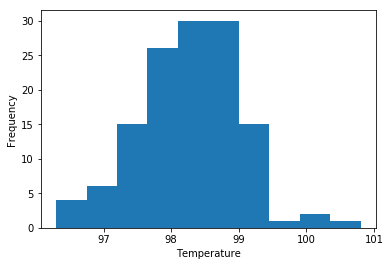

In [25]:
df.temperature.plot(kind='hist')
plt.ylabel('Frequency')
plt.xlabel('Temperature')

In [16]:
df_mean = np.mean(df.temperature)
df_sd = np.std(df.temperature)
temperatures = df.temperature.values

In [17]:
print('Proportion of values within one standard deviation of the mean:',
      len(temperatures[(temperatures>df_mean-df_sd) & (temperatures<df_mean+df_sd)])/len(temperatures))

print('Proportion of values within two standard deviations of the mean:',
      len(temperatures[(temperatures>df_mean-2*df_sd) & (temperatures<df_mean+2*df_sd)])/len(temperatures))

print('Proportion of values within three standard deviations of the mean:',
      len(temperatures[(temperatures>df_mean-3*df_sd) & (temperatures<df_mean+3*df_sd)])/len(temperatures))

Proportion of values within one standard deviation of the mean: 0.6923076923076923
Proportion of values within two standard deviations of the mean: 0.9461538461538461
Proportion of values within three standard deviations of the mean: 0.9923076923076923


It looks like 68-95-99.7 rule holds, but I want to have stronger proof. 

In [18]:
import scipy.stats as stats
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

The second value is a p-value which is nearly 26%. That more than large enough to fail to reject the null hypothesis. That being said, let me set the threshold I'll use to be 5%. I can now work under the assumption that the temperatures are normally distributed.

2. Is the sample size large? Are the observations independent?.
The population size is bigger than 30(its 130). So yes it is large enough for z-test.

3. Is the true population mean really 98.6 degrees F?

This is the situation:

H0 = 98.6

HA != 98.6

alpha = .05

In [19]:
from statsmodels.stats.weightstats import ztest
ztest(df.temperature,value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

The p-value(0.000000049) is very small. Therefore, I reject the null hypothesis that the true population mean is 98.6 degrees Fahrenheit.

Let's try t-test.

In [20]:
stats.ttest_1samp(df.temperature,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The p-value(0.00000024) is still very small. I reject the null hypothesis.

4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [22]:
small_sample = df.sample(10, random_state=42)
small_sample

,temperature,gender,heart_rate
55,98.6,F,82.0
40,98.4,F,79.0
19,99.4,M,70.0
31,97.6,F,61.0
115,98.0,M,64.0
56,98.8,F,70.0
69,98.9,M,80.0
105,96.7,M,71.0
81,98.0,M,67.0
26,97.8,F,62.0


In [26]:
print(stats.ttest_1samp(small_sample.temperature, 98.6))
print(sm.stats.ztest(small_sample.temperature, value=98.6))

Ttest_1sampResult(statistic=-1.5606191828511504, pvalue=0.15304624869561917)
(-1.5606191828511504, 0.11861362990253162)


Both tests give similar results and they are unable to reject that the sample mean is different from the population mean. In other words, there is no statistical difference between the sample mean and population mean. This result is the opposite of what we got earlier though. This is because of the rather small sample size which does not give us a large enough sample size. However, we can perhaps determine what that size might be.

We can do the following. We can sample the data at various sizes (say steps of 10 between 10 and 130) and determine both t- and z-tests. At each sample size, we can repeat the measurements many, many times. This way we can get the average test statistic which should be relatively unbiased estimate. We can do this below and then plot the p-value as a function of (sub)sample size. A good check is for the values at x=130 are the same ones calculated in Question 3 above.

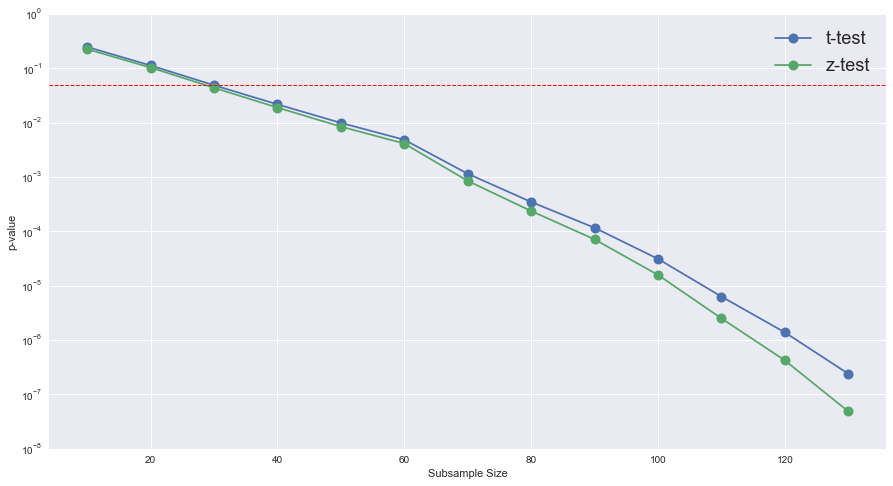

In [28]:
sample_results = pd.DataFrame(index=range(13),columns=['x','tp','zp'])

def subsample(data,n,size):
    '''Function for subsampling for the test statistics'''
    t_test, z_test = [], []
    for i in range(size):
        sample = data.sample(n,replace=False) #Sample w/out replacements
        ts, tp = stats.ttest_1samp(sample.temperature, 98.6)
        zs, zp = sm.stats.ztest(sample.temperature, value=98.6)
        t_test.append(tp)
        z_test.append(zp)
    return (np.mean(t_test), np.mean(z_test)) #Return the average test statistics

#Loop over the entire range of size of dataset, in steps of 10
for i in range(1,14):
    tp, zp = subsample(df, i*10, 1000)
    sample_results.x[i-1]  = i*10
    sample_results.tp[i-1] = tp
    sample_results.zp[i-1] = zp
    
#Plot the results including a line for alpha=0.05
sns.set(rc={"figure.figsize": (15, 8), 'legend.fontsize': 18})
plt.plot(sample_results.x, sample_results.tp, marker='.', ms=20, label='t-test')
plt.plot(sample_results.x, sample_results.zp, marker='.', ms=20, label='z-test')
plt.axhline(0.05, color='red', ls='--', lw=1.)
plt.xlabel('Subsample Size')
plt.ylabel('p-value')
plt.ylim(1e-8,1e0)
plt.legend()
plt.yscale('log')
plt.show()

We can see that it takes a sample size at or greater than 30 for the p-value of either test statistic to be at the alpha = 0.05 level (the dotted red line). This seems to make sense that value is the general rule of thumb for these types of calculations. It is also worth noting we do recover the original values at the subsample size of 130.

The tests cannot distinguish a difference between the smaller sample mean and population means.

5. At what temperature should we consider someone's temperature to be "abnormal"?

A 95% confidence interval would be good. The margin of error, M.E, is given by:

M.E = critical value x standard error

The critical value is 1.96 for a 95% confidence interval and the standard error, S.E, is:

S.E = sample standard deviation / \sqrk{n}

In [21]:
se = df_temp_sd/np.sqrt(len(df))
me = 1.96*se
confidence_interval = [df_temp_mean-me,df_temp_mean+me]
confidence_interval

[98.12367980442819, 98.37478173403336]

If someone's temperature goes out of these bounds, it would be classified as "abnormal".

6. Is there a significant difference between males and females in normal temperature?

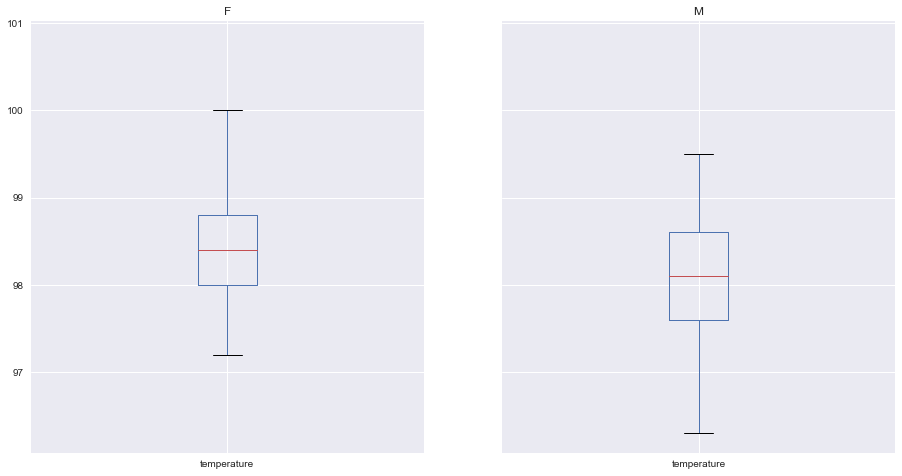

In [29]:
# Create two dataframes for males and females and investigate
male_df = df[df.gender.str.contains('M')]
female_df = df[df.gender.str.contains('F')]
df[['gender', 'temperature']].groupby('gender').boxplot(return_type='axes')
plt.show()

There seem to be a difference between the two but note immediately that the means for both genders are within the IQR (interquartile range) of each other. This clues us to the fact that their respective means are not that far from each other. 

We can calculate a 2-sample t-test since we have two sample means we want to compare to see if there is significant difference between means.

In [30]:
stats.ttest_ind(male_df.temperature, female_df.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

The p-value of this test is relatively small at 2.4%. This means that the two sample means are statistically different. To see if this p-value is significant we can calculate the 95% CI for each sample. An overlap would suggest that the two sample means are not so different. We can repurpose the PI function we defined earlier for this exercise.

In [31]:
def calc_ci(data, alpha):
    '''Function to return sample mean and CI for given level'''
    mean = np.mean(data)
    std  = np.std(data)
    std_error = std / np.sqrt(len(data))
    error = std_error * stats.norm.ppf(1 - (1-alpha)/2.)
    return (mean,error)

mean_m, error_m = calc_ci(male_df.temperature, 0.95)
print('Male  \t| Sample mean is %f +/- %f.' % (mean_m, error_m))
print('      \t| The 95%% CI is %f to %f.\n' % (mean_m-error_m, mean_m+error_m))

mean_f, error_f = calc_ci(female_df.temperature, 0.95)
print('Female\t| Sample mean is %f +/- %f.' % (mean_f, error_f))
print('      \t| The 95%% CI is %f to %f.' % (mean_f-error_f, mean_f+error_f))

Male  	| Sample mean is 98.104615 +/- 0.168558.
      	| The 95% CI is 97.936057 to 98.273174.

Female	| Sample mean is 98.393846 +/- 0.179349.
      	| The 95% CI is 98.214497 to 98.573195.


There is an overlap. Let's graph to visualize.

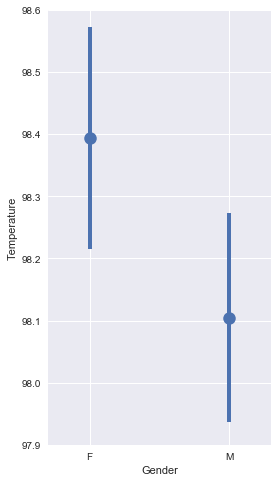

In [32]:
plt.figure(figsize=(4,8))
plt.errorbar(['F','M'], [mean_f, mean_m], [error_f, error_m], marker='.', ms=25, ls='None', lw=4)
plt.margins(0.3)
plt.xlabel('Gender')
plt.ylabel('Temperature')
plt.ylim(97.9,98.6)
plt.show()

There is a small overlap between the two sample means. So even though the p-value suggests there is only about a 2.4% chance the the difference in sample means is coincidental, the CI says that perhaps that chance is bigger. Therefore, I do not think I can reject the null hypothesis. In other words, there is not a significant statistical difference in mean temperature between male and female.

Regardless of the difference between male and female, we can see how well they compare to the supposed population mean of 98.6. We see that the female mean is higher than male, so it might be a better comparison. We can do a t-test as before with each gender separately.

In [35]:
print(stats.ttest_1samp(male_df.temperature, 98.6))
print(stats.ttest_1samp(female_df.temperature, 98.6))

Ttest_1sampResult(statistic=-5.715757449318691, pvalue=3.083840317313081e-07)
Ttest_1sampResult(statistic=-2.2354980796784965, pvalue=0.028880450789682037)


The male mean is different from the population mean, while the p-value for the female mean is not so small. It is in fact around 2.8% which is around the same level as the difference between male and female. So there might be some compatibilty between the accepted 98.6 mean with the female mean. 
My answer is there is no significant difference.